In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Loading the data
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Set up the example for demonstration using median income as independet variable
# and median house value as dependent variable.
df = df[['median_income','median_house_value']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   median_house_value  20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


In [6]:
df.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


In [7]:
df.shape

(20640, 2)

In [8]:
# to find elements from array
df_num = df.select_dtypes(include=['number'])
df_num.nunique()

median_income         12928
median_house_value     3842
dtype: int64

In [9]:
#gives the correlation between dependent and independent variables
df_num.corr()

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


In [10]:
df.groupby(by='median_house_value').count().sort_values('median_house_value',ascending=False).head(10)

,median_income
median_house_value,
500001.0,965
500000.0,27
499100.0,1
499000.0,1
498800.0,1
498700.0,1
498600.0,1
498400.0,1
497600.0,1


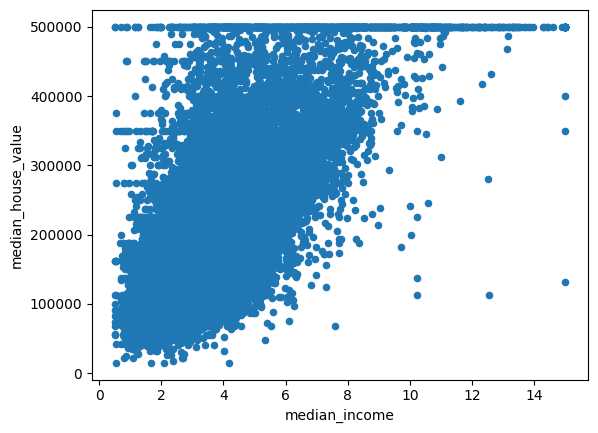

In [11]:
house_plot = df.plot.scatter('median_income','median_house_value')

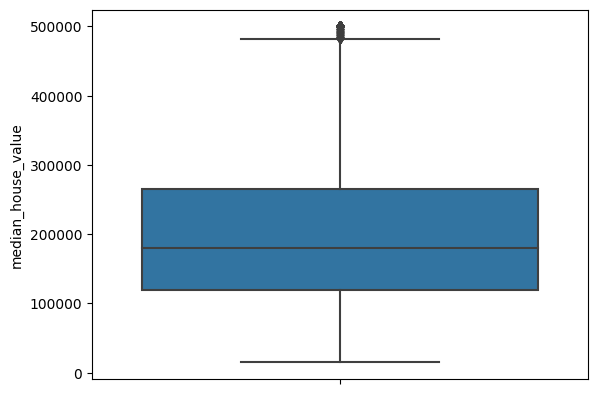

In [12]:
#Boxplot using seaborn
house_plot = sns.boxplot(y='median_house_value',data=df)

In [13]:
# Prepare the data for training and testing
#1) Divide our independent and dependent variables into two separate variables.
#2) Split the given data into new training and testing datasets
X = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20) 
#20% of training data for test and 80% of training data


In [16]:
X_train.shape

(16512, 1)

In [17]:
X_test.shape

(4128, 1)

In [18]:
y_train.shape

(16512,)

In [19]:
# importing the linear regression algorithm
from sklearn.linear_model import LinearRegression

In [20]:
#Create a variable
regressor = LinearRegression()

#training the model
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Visualization
# y = mx + c
line = regressor.coef_*X + regressor.intercept_

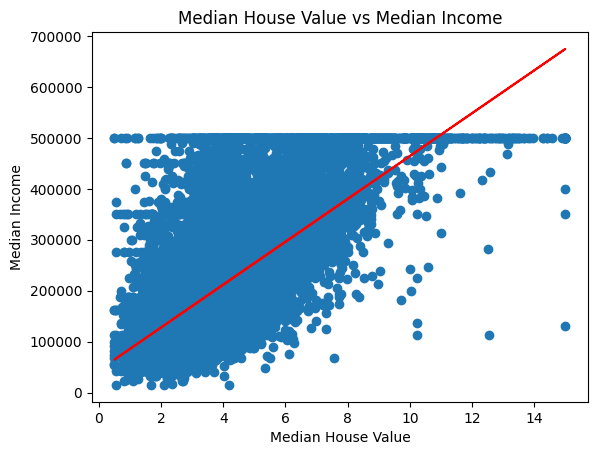

In [ ]:
# Let's plot the graph
plt.scatter(X,y)
plt.plot(X,line,'r')
plt.xlabel("Median House Value")
plt.ylabel("Median Income")
plt.title("Median House Value vs Median Income")
plt.show()

In [ ]:
# Testing the data
y_pred = regressor.predict(X_test)
# To compare the actual values with predicted values
compare_df = pd.DataFrame({"Desired Output(Actual)":y_test,
                           "Predicted Output":y_pred})
compare_df

,Desired Output(Actual),Predicted Output
0,43100.0,100771.538250
1,217100.0,166977.871765
2,201600.0,261601.612474
3,170500.0,201431.243927
4,92200.0,154539.998309
...,...,...
4123,285900.0,274161.467104
4124,251100.0,250505.531927
4125,183100.0,155385.454029
4126,133300.0,191571.800105


In [ ]:
# Evaluate the Model
# Coefficient
print("Coefficient:", regressor.coef_)


Coefficient: [42062.47364391]


In [ ]:
print('coefficient of Determination: {:.2f}'.format(r2_score(y_test,y_pred)))

coefficient of Determination: 0.45


In [ ]:
print('Mean squared value: {:.3f}'.format(mean_squared_error(y_test,y_pred)))

Mean squared value: 7480730939.251


In [ ]:
# evaluate the Model's training score and test score
print("Regression model training score={:.2f}".format(regressor.score(X_train,y_train)))
print("Regression model training score={:.2f}".format(regressor.score(X_test,y_test)))

Regression model training score=0.48
Regression model training score=0.45
